# Matplotlib

Maintenant qu'on est capable de sortir des données assez complexe d'un ensemble de données, la dernière pierre du gantelet d'infini c'est de pouvoir afficher ces données sous la forme de graphiques.

On a utilisé pandas pour travailler nos données et ça sera le rôle de **matplotlib** d'afficher nos données sous la forme de jolis graphiques.  
Ces deux librairies fonctionnent très bien conjointement, d'où leurs présence dans Anaconda.

Vous l'auriez peut-être déjà deviné mais MatPlotLib c'est la contraction de Mathematic Plot Library, où plot signifie un graphique.  
Je trouve vraiment pas ça terrible comme nom mais ça a le mérite d'être clair.

## Les bases

Pour commencer, sans grande surprise, on importe matplotlib et on lui donne un petit diminutif pour s'en servir facilement.

On en profite pour importer pandas aussi, histoire de récupérer des données à afficher.

In [1]:
import matplotlib.pyplot as plt
import pandas as p

Maintenant qu'on est prêts, voyons un exemple assez basique de graphique avec matplotlib.

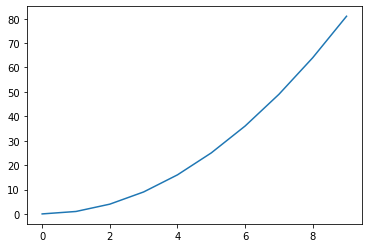

In [2]:
# Permet d'obtenir facilement des outils pour créer une figure
fig, ax = plt.subplots()

# Liste de nombre de 0 à 9
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# On aurait pu écrire ça comme ça
# x = range(10)

# On prend la même liste, mais on met tout au carré
y = [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

# On aurait pu écrire ça comme ça en mode fonctionnel
# y = list(map(lambda v: pow(v, 2), x))

# On utilise l'objet `ax` pour créer un graphique en passant notre axe X et Y
ax.plot(x, y);

Ici on a utilisé `ax.plot()` pour avoir un graphique en courbe, mais matplotlib est capable d'afficher [plein de formes de graphiques différents](https://matplotlib.org/stable/plot_types/index.html).

Exemple avec un camembert 😋

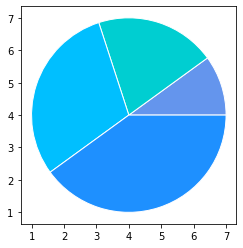

In [3]:
# En x c'est nos valeurs, ça pourrait être des pourcentages
x = [1, 2, 3, 4]
# Couleurs
colors = ['CornflowerBlue', 'DarkTurquoise', 'DeepSkyBlue', 'DodgerBlue']

fig, ax = plt.subplots()

# Il faut manuellement placer le diagramme au centre, sinon il s'affiche à 0,0 en tout petit
ax.pie(x, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True);

## Avec pandas

Voyons comment afficher des données depuis pandas

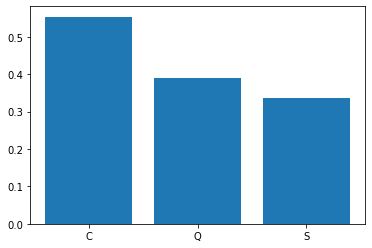

In [11]:
# On charge notre document, on connait
titanic = p.read_csv("demo-pandas/titanic.csv")

# On récupère nos objets de configuration
fig, ax = plt.subplots()

# On récupère des infos qu'on connais déjà, le ratio de survie moyen par embarquement
# On passe un paramètre supplémentaire, `as_index`, on verra ça juste après
survival_rate_by_embarkment = titanic.groupby(["Embarked"], as_index = False)["Survived"].mean()

# On passe notre axe x et y et ça suffit pour afficher notre figure
ax.bar(survival_rate_by_embarkment["Embarked"], survival_rate_by_embarkment["Survived"]);

Pas si compliqué finalement.
Le seul détail un peu technique ça va être ce nouveau paramètre qu'on passe, `as_index = False`.

Regardons la forme des données que nous donne pandas quand on groupe:

In [5]:
grouped_by = titanic.groupby(["Embarked"])["Survived"].mean()
grouped_by

Embarked
C    0.553571
Q    0.389610
S    0.337481
Name: Survived, dtype: float64

Si vous vous souvenez des données qu'on avait au départ, la première colonne représentait un index qui servait à retrouver nos données dans les filtres.

Ici, après ce `groupby()`, on n'a plus de colonne `index`, elle est plus ou moins remplacé par la colonne `Embarked`.  
Regardons ce que ça donne d'accéder à cette colonne

In [6]:
try: 
    grouped_by["Embarked"]
except KeyError:
    print("pandas nous refuse l'accès à l'index")

pandas nous refuse l'accès à l'index


C'est probablement une sécurité pour éviter de bidouiller les index et casser le fonctionnement de pandas.

D'où l'intérêt de passer ce paramètre `as_index = False` pour dire à pandas de grouper sans utiliser cette colonne en temps qu'index

In [7]:
grouped_by = titanic.groupby(["Embarked"], as_index = False)["Survived"].mean()
grouped_by["Embarked"]

0    C
1    Q
2    S
Name: Embarked, dtype: object

Encore un exemple de graphique pour la route, avec une configuration supplémentaire

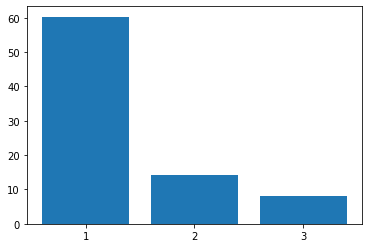

In [8]:
# On reset nos objets pour recommencer la configuration depuis zéro
fig, ax = plt.subplots()

# On récup le coût médian des tickets par classe
fare_by_class = titanic.groupby(["Pclass"], as_index = False)["Fare"].median()

# On affiche le graphique
ax.bar(fare_by_class["Pclass"], fare_by_class["Fare"]);

# On force l'abscisse pour que ce soit joli et pas avoir de décimales qui n'ont rien à voir
# Commentez cette ligne pour voir la différence 
ax.set(xticks=[1, 2, 3]);

Bon, le truc c'est que ça peut vite devenir compliqué si on veux, par exemple, deux barres d'informations par valeur de notre abscisse.  
Il faudrait indiquer à matplotlib d'afficher une valeur mais de la décaler de la moitié de la largeur de la barre sur la gauche, pour ensuite ajouter l'autre valeur, décalée de la moitié de sa largeur vers la droite, c'est vite très complexe.

Pour rappel, matplotlib est une librairie assez bas niveau, tout est possible avec, mais ça demande pas mal de configuration, ce n'est peut-être pas le meilleur outil pour simplement extraire des informations.

Aussi, je vais m'arrêter là pour matplotlib et faire un petit tour sur numpy

# NumPy

Numpy est une autre librairie très versatile qui a pour but de traiter des chiffres (en gros).

Ici, pas de manipulation de tableau ou de graphe, numpy est juste là pour rendre la vie plus simple au data scientists.

Petit exemple de ce qu'il est capable de faire avec des listes

In [12]:
import numpy as np
from numpy.random import default_rng

rng = default_rng()

print("Comme range(10)")
print(np.arange(10))
print()

print("De 5 à 15")
print(np.arange(5, 15))
print()

print("De 5 à 15, de deux en deux")
print(np.arange(5, 15, 2))
print()

print("De 0 à 9, en tableau à deux dimensions de 2 lignes de 5 colonne")
print(np.arange(10).reshape(2,5))
print()

print("De 5 à 15, mais avec 20 entrée espacé linéairement")
print(np.linspace(5, 15, num = 20))
print()

print("100 valeurs linéaires de 0 à 50, puis de 50 à 100")
print(np.linspace(0, 100, num = 200).reshape(2, 100))
print()

print("Un nombre aléatoire")
print(rng.standard_normal())

Comme range(10)
[0 1 2 3 4 5 6 7 8 9]

De 5 à 15
[ 5  6  7  8  9 10 11 12 13 14]

De 5 à 15, de deux en deux
[ 5  7  9 11 13]

De 0 à 9, en tableau à deux dimensions de 2 lignes de 5 colonne
[[0 1 2 3 4]
 [5 6 7 8 9]]

De 5 à 15, mais avec 20 entrée espacé linéairement
[ 5.          5.52631579  6.05263158  6.57894737  7.10526316  7.63157895
  8.15789474  8.68421053  9.21052632  9.73684211 10.26315789 10.78947368
 11.31578947 11.84210526 12.36842105 12.89473684 13.42105263 13.94736842
 14.47368421 15.        ]

100 valeurs linéaires de 0 à 50, puis de 50 à 100
[[  0.           0.50251256   1.00502513   1.50753769   2.01005025
    2.51256281   3.01507538   3.51758794   4.0201005    4.52261307
    5.02512563   5.52763819   6.03015075   6.53266332   7.03517588
    7.53768844   8.04020101   8.54271357   9.04522613   9.54773869
   10.05025126  10.55276382  11.05527638  11.55778894  12.06030151
   12.56281407  13.06532663  13.5678392   14.07035176  14.57286432
   15.07537688  15.57788945  16.

Il est possible de faire énormément de choses avec numpy mais je n'aurait pas le temps de m'étendre en détail dessus ici, gardez le quand même à l'esprit pour sa capacité à vous simplifier la vie (surtout dans la création de valeurs comme des listes)

# 📝 À vous ! (4)

Ouvrez le fichier notebook dans le dossier `a-vous/a-vous-4.ipynb` et remplissez les blocs de code pour obtenir le résultat attendu.